## DSCI 100 Group 11 Project ## 

Authors: Ishita Sharma (66518101), Eric Haung, Yunfeng Bu (70556543), Andrew Liu (50966365)


### Introduction ###

The objective of this project is to understand user behaviour when playing video games such as MineCraft. By understanding how users interact with the game, researchers can make adjustments that better serve the user. With this information they can also work on strategies to improve recruitment and create better experiences for the user. This will in turn keep users subscribed to the game for longer. The University of British Columbia’s Computer Science research team is using MineCraft to collect real-world data from users playing the game. For this project, we will be working on answering which kinds of players are most likely to contribute a large amount of data. The goal is to develop a model that can identify which players are most likely to engage heavily with the MineCraft server

We will be using two datasets for this project, which we will combine into one dataset. The first one is the Players dataset which provides the following information; name, gender, age, experience level, subscription status, hashed email of user, number of played hours, player ID, and an organization name. The second dataset is the Sessions dataset which provides the following information; the users hashed email, start and end time, and original start and end time. To answer our specific question we will be using a variable that includes the total played hours as a response variable. And then our explanatory variable will include gender, experience, age, subscription status, and played hours. We will be combining the dataset by using a common variable which is the Hashed Email. 


In [3]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(readr)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Methods ### 

To start answering our question, we loaded two datasets; Players and Sessions. We proceeded to wrangle our datasets by cleaning them into tidy format, filtering for necessary variables, and then transforming them into a combined dataset. 

##### Sessions Dataset: 
We converted start_time and end_time into datetime format. And calculated the session durations in minutes. Lastly we pooled the data to compute the total play duration and frequency of sessions for each user. 

##### Players Dataset: 
We removed any unnecessary column such as individualID and organizationName. Then converted categorical variables into factor variables (experience, subscribe, and gender). And lastly filtered out any data points that did not include 

##### Combined Dataset: 
We combined these two datasets by use of the common variable; hashedEmail to understand how demographic factors were correlated to the player engagement. 

In [4]:
#Data Wrangling 
url1<-"https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
url2<-"https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"

session_data <- read_csv(url1)
players_data<-read_csv(url2)

session_data_wrangle<-session_data|>             
                      mutate(start_time=dmy_hm(start_time),
                      end_time=dmy_hm(end_time)
                    )|>
              filter(!is.na(start_time)&!is.na(end_time))|>
              mutate(Duration=as.numeric(end_time-start_time,unit="mins")
                    )|>
              group_by(hashedEmail)|>
              mutate(frequency = n(),
                     total_duration=sum(Duration,na.rm=TRUE)
                    ) |>
              ungroup()

players_data_wrangle<-players_data|>
                      select(-individualId,-organizationName)|>
                      mutate(experience = as.factor(experience),
                             subscribe = as.factor(subscribe),
                             gender = as.factor(gender))|>
                      filter(!is.na(experience) & !is.na(played_hours) & !is.na(age))



combined_data <- session_data_wrangle|>
                     left_join(players_data_wrangle, by = "hashedEmail")

  
combined_data_plot<-combined_data|>
               distinct(hashedEmail,start_time,.keep_all = TRUE)|>
               select(played_hours, name, gender, age,Duration,frequency, total_duration, experience, subscribe)|>
               distinct(name,.keep_all = TRUE)|>
               select(played_hours,gender,age,experience,frequency,total_duration)|>
               filter(age>=15&age<=30)



# head(session_data,10)
# head(players_data,10)
# head(combined_data_1,10)


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message in scale_y_log10(labels = comma):
“log-10 transformation introduced infinite values.”


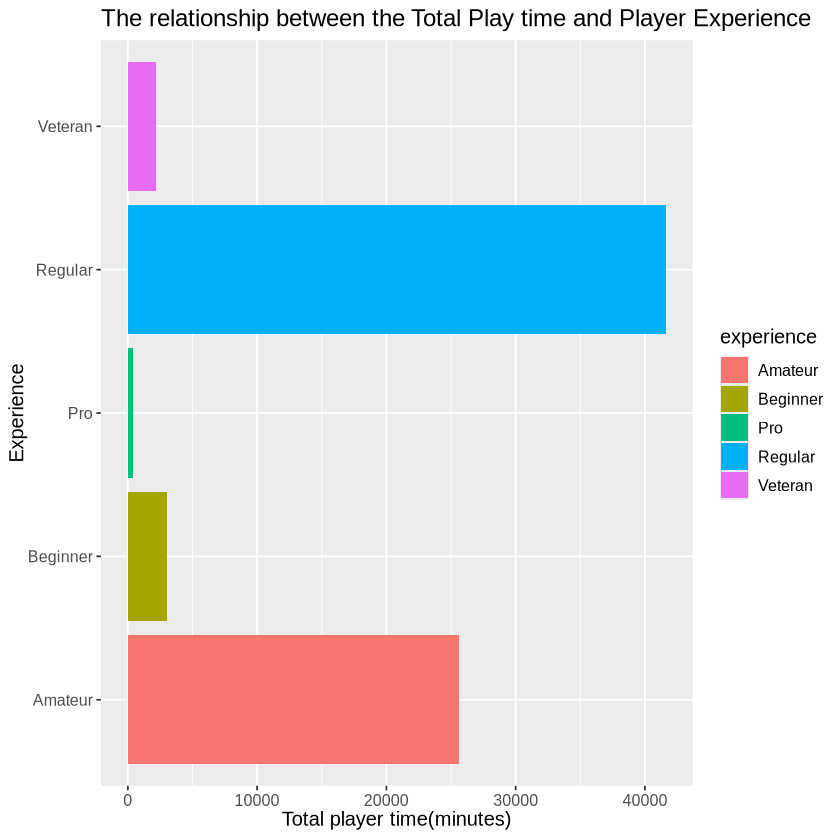

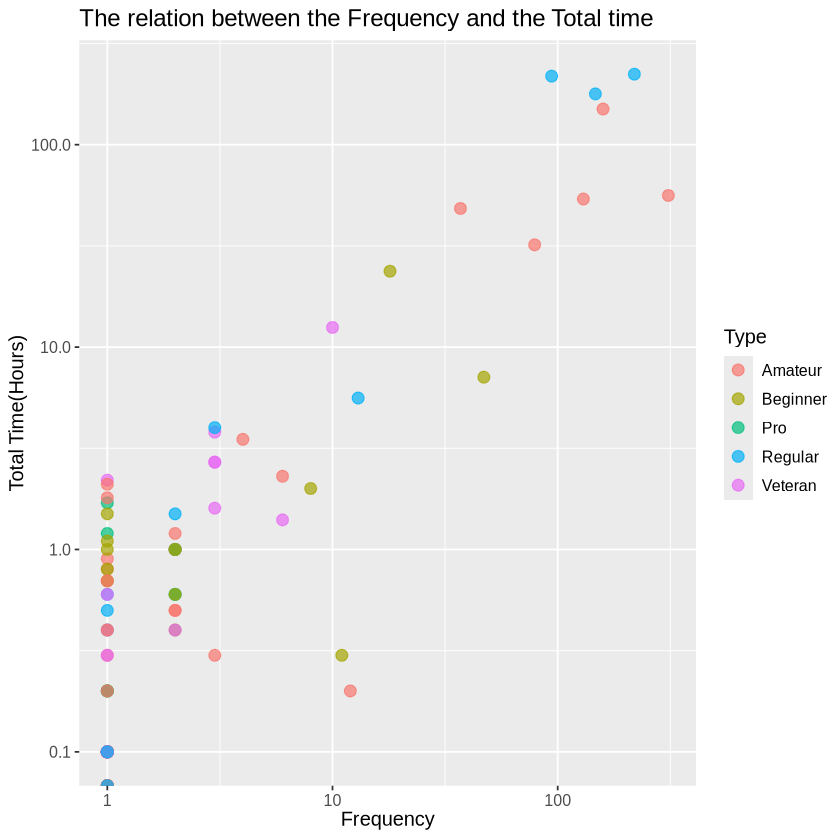

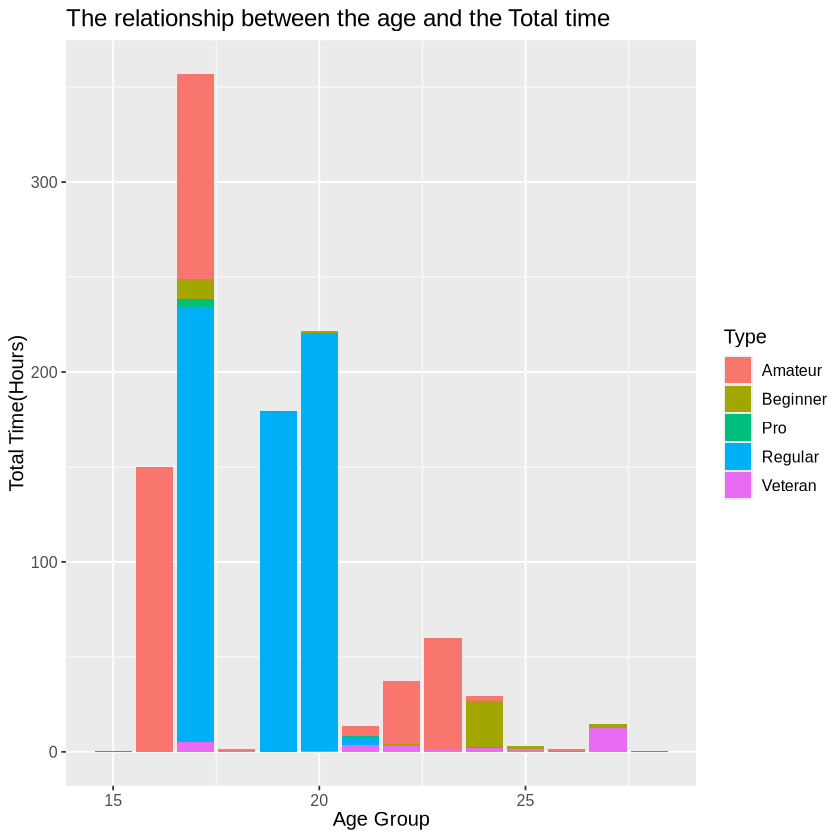

In [3]:
#Visualization
analysis_plot_1<-combined_data_plot|>
               ggplot(aes(x=total_duration,y=experience,fill = experience))+
               geom_bar(stat="identity")+
               labs(
                   title="The relationship between the Total Play time and Player Experience",
                   y="Experience",
                   x="Total player time(minutes)"
               )+
               theme(text=element_text(size=12))
analysis_plot_1
#Time vs Experience
analysis_plot_2<-combined_data_plot|>
               ggplot(aes(x=frequency,y=played_hours,colour = experience))+
               geom_point(size = 3, alpha = 0.7)+
               labs(
                   title="The relation between the Frequency and the Total time",
                   x="Frequency",
                   y="Total Time(Hours)",
                   colour="Type"
               )+
               scale_x_log10(labels=comma)+
               scale_y_log10(labels=comma)+
               theme(text=element_text(size=12))
analysis_plot_2
#Time vs Frequency
analysis_plot_3<-combined_data_plot|>
               ggplot(aes(x=age,y=played_hours,fill = experience))+
               geom_bar(stat="identity")+
               labs(
                   title="The relationship between the age and the Total time",
                   x="Age Group",
                   y="Total Time(Hours)",
                   fill="Type"
               )+
               theme(text=element_text(size=12))
analysis_plot_3
#Time vs Age

In [4]:
# Spliting Data
set.seed(1004)


combined_data_model <- combined_data_plot|>
                    select(played_hours,frequency,age,experience)
#                filter(played_hours > ...)
# if you need to filter whose playe_hours is 0 

mc_data <- combined_data_model |>
  mutate(played_degree = cut(
    played_hours,
    breaks = c(0, 1, 4, Inf),
    labels = c("Try","Play","Enjoy"),
    include.lowest = TRUE))
mc_split <- initial_split(mc_data,prop=0.80,strata=played_degree)
mc_training <- training(mc_split)
mc_testing <- testing(mc_split)
# mc_training
# mc_testing

##### Classification Model: 

K-nearest neighbors (KNN) algorithm organizes data points within a multidimensional space based on their features (Murel & Kavlakoglu, 2024). We used the classification model to categorize players based on their engagement levels in terms of played hours. For this model we transformed the played_hours variable into a categorical variable. 
- Try (0-1 hrs): Minimal engagement 
- Play (1-4 hrs): Moderate engagement 
- Enjoy (4+ hrs): High engagement

The classification model will demonstrate the demographic characteristics that are associated with players in each engagement category. By predicting the likelihood of a player falling into a specific category, the model can pinpoint who to target for recruitment effort


.pred_class
<fct>
Try
Try
Try
Try
Try
Play
Try
Try
Try


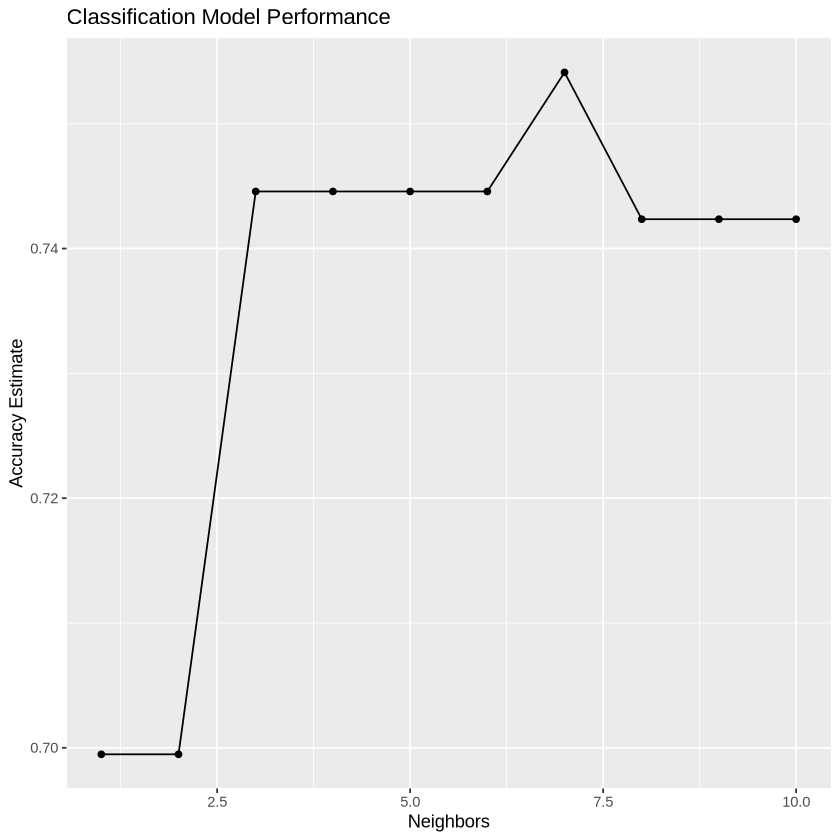

In [5]:
#Classification 
set.seed(1004)
mc_recipe <- recipe(played_degree ~ ., data = mc_training) |>
  step_rm(played_hours) |>
  step_integer(all_predictors()) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

mc_vfold <- vfold_cv(mc_training, v = 5, strata = played_degree)#cross-validation

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |>
  add_recipe(mc_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = mc_vfold, grid = k_vals) |>
  collect_metrics()|> 
  filter(.metric == "accuracy")

cross_val_plot <- ggplot(knn_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title = "Classification Model Performance")
cross_val_plot #the plot to choose best k
#we may choose k= 7

mc_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
  set_engine("kknn") |>
  set_mode("classification")

mc_classification_results <- workflow() |>
  add_recipe(mc_recipe) |>
  add_model(mc_spec) |>
  fit(data = mc_training) |>
  predict(new_data = mc_testing)

mc_classification_results # the results of classification

##### Regression Model: 
Regression is a method that is used to analyze the relationship between a dependent variable and one or more independent variables. It can help determine if changes in the dependent variable are linked to the changes in the independent variable (Beers, 2024). We also used the regression model to predict the exact amount of played hours a user might contribute to based on demographic characteristics. This model can output a continuous prediction of played hours, allowing for a precise measurement of how long a player is engaging with the game. It can also help quantify the impact of explanatory variables on the played hours. 

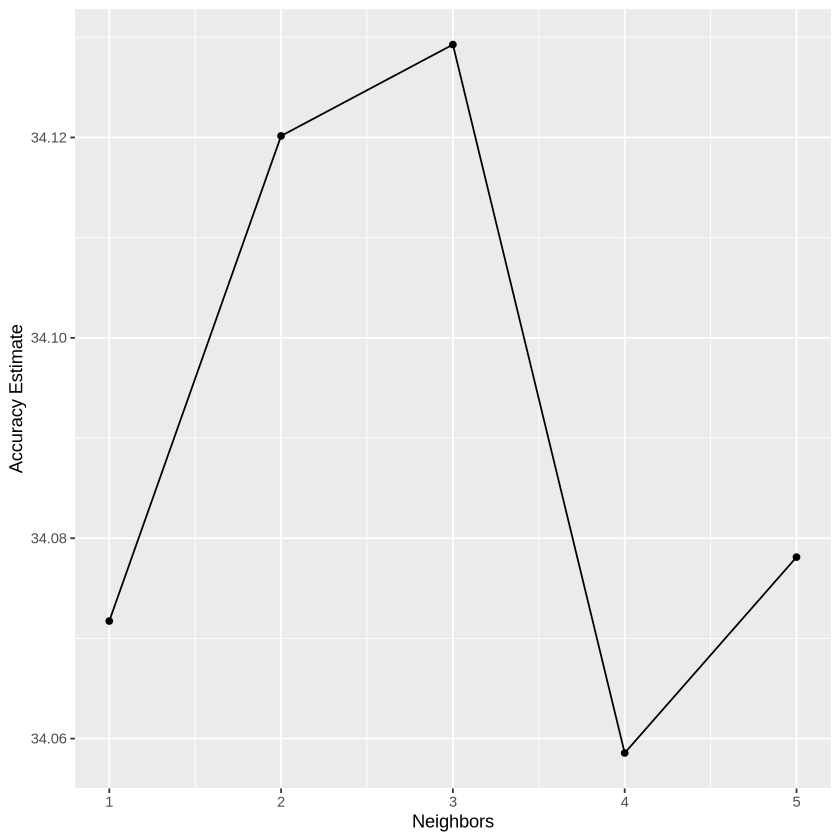

In [6]:
#regression part
set.seed(104)
mc_recipe_regression <- recipe(played_hours~ ., data = mc_training)|>
    step_integer(all_predictors()) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

mc_vfold_regression <- vfold_cv(mc_training, v = 5, strata = played_hours)

knn_tune_regression <- nearest_neighbor(weight_func = "rectangular" ,neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("regression")

k_vals_regression <- tibble(neighbors = seq(from = 1, to = 5, by = 1))

knn_results_regression <- workflow() |>
      add_recipe(mc_recipe_regression) |>
      add_model(knn_tune_regression) |>
      tune_grid(resamples =  mc_vfold_regression, grid = k_vals_regression) |>
      collect_metrics()|> 
      filter(.metric == "rmse")

cross_val_plot <- ggplot(knn_results_regression, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate")
cross_val_plot #the plot to choose best k
#we may choose k= 3

mc_spec_regression <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("regression")

mc_regression_results <- workflow() |>
  add_recipe(mc_recipe_regression) |>
  add_model(mc_spec_regression) |>
  fit(data = mc_training) |>
  predict(new_data = mc_testing)

# knn_rmspe <- workflow() |>
#          add_recipe(mc_recipe) |>
#          add_model(mc_spec) |>
#          fit(data = mc_training) |>
#           predict(new_data= mc_testing) |>
#           bind_cols(mc_testing) |>
#           metrics(truth =played_hours, estimate = .pred)
# knn_rmspe 


# mc_regression_results# the result of regression

In [7]:
# Print out the results for reference during analysis

# Classification Model Evaluation
mc_classification_results <- workflow() |>
  add_recipe(mc_recipe) |>
  add_model(mc_spec) |>
  fit(data = mc_training) |>
  predict(new_data = mc_testing) |>
  bind_cols(mc_testing)

# Confusion Matrix
confusion_matrix <- mc_classification_results |>
  conf_mat(truth = played_degree, estimate = .pred_class)
print(confusion_matrix)

# Regression Model Evaluation
mc_regression_results <- workflow() |>
  add_recipe(mc_recipe_regression) |>
  add_model(mc_spec_regression) |>
  fit(data = mc_training) |>
  predict(new_data = mc_testing) |>
  bind_cols(mc_testing)

# RMSE and R-squared
regression_metrics <- mc_regression_results |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric %in% c("rmse", "rsq"))
print(regression_metrics)


# Calculate total number of data points
total_data_points <- nrow(mc_data)
print(paste("Total number of data points:", total_data_points))

# Count the number of instances in each class
class_counts <- mc_data %>%
  count(played_degree)
print("Counts in each engagement category:")
print(class_counts)


          Truth
Prediction Try Play Enjoy
     Try    15    4     3
     Play    1    0     0
     Enjoy   0    0     0
# A tibble: 2 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard      11.7  
2 rsq     standard       0.159
[1] "Total number of data points: 108"
[1] "Counts in each engagement category:"
# A tibble: 3 × 2
  played_degree     n
  <fct>         <int>
1 Try              78
2 Play             18
3 Enjoy            12


---

## Analysis and Discussion of Results

### Data Summary

- **Total number of player data points:** 108
- **Counts in each engagement category:**

  | Engagement Level | Count |
  |------------------|-------|
  | Try              | 78    |
  | Play             | 18    |
  | Enjoy            | 12    |

The dataset consists of 108 players, with the majority (78 players) falling into the "Try" category (minimal engagement). The "Play" and "Enjoy" categories have significantly fewer players, with 18 and 12 players respectively.

### Summary of Findings

**Classification Model:**

- **Confusion Matrix:**

  |               | **Try** | **Play** | **Enjoy** |
  |---------------|:-------:|:--------:|:---------:|
  | **Predicted Try**   |   15    |    4     |     3     |
  | **Predicted Play**  |    1    |    0     |     0     |
  | **Predicted Enjoy** |    0    |    0     |     0     |

- **Metrics:**
  - **Accuracy:** 65.2%

**Regression Model:**

- **Metrics:**
  - **RMSE:** 11.7 hours
  - **R-squared:** 15.9%

### Interpretation

**Classification Model:**

The model correctly classified 15 instances of the "Try" category but misclassified most instances of "Play" and "Enjoy." The accuracy is 65.2%, but the negative Kappa statistic indicates poor agreement beyond chance.

**Impact of Low Counts:**

The low number of instances in the "Play" (18) and "Enjoy" (12) categories likely contributed to the model's poor performance in predicting these classes. With such imbalanced data, the model becomes biased towards the majority class ("Try"), reducing its ability to learn patterns associated with higher engagement levels.

**Regression Model:**

The regression model's high RMSE and low R-squared value suggest it does not effectively predict the actual played hours. The limited variance explained indicates that the predictors used are insufficient to model the complexity of player engagement.

### Expectations vs. Results

We expected the models to effectively predict player engagement levels. However, the imbalanced dataset and limited features led to underperforming models. The dominance of the "Try" category in the data skewed the classification results, and the regression model could not capture the variability in played hours.

### Impact of Findings

**Confidence in Models:**

The low counts in the "Play" and "Enjoy" categories reduce our confidence in the models' predictions for these groups. The classification model's inability to correctly predict higher engagement levels limits its usefulness in identifying players who are more likely to engage deeply with the game.

**Implications:**

- **Strategic Decisions:** The unreliable predictions hinder the development of targeted strategies for player retention and engagement enhancement.
- **Resource Allocation:** Misallocation of resources may occur if the models cannot accurately identify high-value players.

### Future Directions

- **Data Balancing:** To address the class imbalance in our dataset, we should implement techniques like oversampling the minority classes ("Play" and "Enjoy") or undersampling the majority class ("Try"). Methods such as SMOTE (Synthetic Minority Over-sampling Technique) can generate synthetic examples for the minority classes, helping the model learn from a more balanced dataset. This adjustment is likely to improve the classification model's ability to predict higher engagement levels accurately.

- **Feature Enrichment:** Enhancing our dataset with additional features could improve model predictions. Incorporating in-game behavior metrics (e.g., types of activities performed, achievements unlocked), social interactions (e.g., number of friends, participation in multiplayer events), and psychological factors (e.g., player motivations, playstyles) may provide deeper insights into what drives player engagement. These enriched features can help the models capture more complex patterns influencing played hours.

- **Alternative Models:** Exploring other machine learning algorithms that are better suited for imbalanced data and complex relationships might enhance predictive performance. Algorithms like Random Forests, Gradient Boosting Machines, or Support Vector Machines can handle non-linear patterns and are often more robust to class imbalances. Experimenting with these models, along with thorough hyperparameter tuning, could lead to more accurate predictions.

- **Data Collection:** To improve model training and prediction reliability, it's crucial to gather more data on players in the "Play" and "Enjoy" categories. This could involve strategies like targeted recruitment campaigns focusing on engaging players who are more likely to spend significant time in the game. Additionally, expanding data collection efforts to include more diverse player demographics can help create a more representative dataset, thereby enhancing the model's generalizability.

---


#### References 

Beers, B. (n.d.). Regression: Definition, analysis, calculation, and example. Investopedia. https://www.investopedia.com/terms/r/regression.asp 

Murel, J., & Kavlakoglu, E. (2024, August 29). What are classification models?. IBM. https://www.ibm.com/topics/classification-models 
